In [1]:
#dl.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#24 January 2018

In [2]:
#import matplotlib pandas etc
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
pd.set_option('display.max_columns', None)
pd.set_option('display.height', None)
pd.set_option('display.width', None)

height has been deprecated.



In [3]:
#read books dataframe
import pickle
with open('chunks.pkl', 'rb') as fp:
    chunks = pickle.load(fp)
print 'number of records = ', len(chunks)
print 'number of books = ', len(chunks['input_file'].unique())
chunks.head()

number of records =  126114
number of books =  89


,author,author_id,title,input_file,text_chunk
96074,A.H. Clough,0,Plutarch's Lives,iso/etext96/plivs10.txt,"and their infantry, who were placed in the lef..."
38665,Percy Bysshe Shelley,65,The Complete Poetical Works of Percy Bysshe,iso/etext03/shlyc10.txt,"One of their associates is, to my knowledge, a..."
74739,Kate Milner Rabb,51,National Epics,iso/etext05/8ntle10.txt,strong car in which to carry away the soiled g...
75323,Kate Milner Rabb,51,National Epics,iso/etext05/8ntle10.txt,his honor in the land grows greater day by day...
84031,Austen,7,Sense And Sensibility,iso/etext94/sense11.txt,and my cousins would be proud to know her.--My...


In [4]:
#show titles and number of chunks
#need to fix Austnn & Jane Austen
N = pd.DataFrame(chunks.groupby(['author', 'title', 'input_file'])['text_chunk'].count()).reset_index()\
    .sort_values('author')
N = N.rename(columns={'text_chunk':'N_chunks'})
N.head()

,author,title,input_file,N_chunks
0,A.H. Clough,Plutarch's Lives,iso/etext96/plivs10.txt,2200
1,Adam Smith,Wealth Of Nations,iso/etext02/wltnt10.txt,2200
2,Adams,The Education Of Henry Adams,iso/etext00/eduha10.txt,1260
3,Anne C. Lynch Botta,Handbook Of Universal Literature,iso/etext05/8unlt10.txt,1699
4,Anthony Trollope,The Last Chronicle Of Barset,iso/etext02/lacob11.txt,2200


In [5]:
#select 3 books
records = chunks
id0 = 12 #Don Quijote in Spanish
id1 = 79 #bullfinch Mythology
id2 = 82 #Le Mort D'Arthur
idx = (records['author_id'] == id0) | (records['author_id'] == id1) | (records['author_id'] == id2)
records = records[idx].copy()
records['author_id'] = records['author_id'].replace({id0:0, id1:1, id2:2})#, axis=1)
records.head(20)

,author,author_id,title,input_file,text_chunk
111052,Thomas Malory,2,Le Mort D'Arthur,iso/etext98/2mart10.txt,"Fair fellows, said Galihodin, yonder come four..."
124876,"Cervantes, In Spanish",0,Don Quijote,iso/etext99/2donq10.txt,ordenado: que todas las mujeres se entrasen en...
125284,"Cervantes, In Spanish",0,Don Quijote,iso/etext99/2donq10.txt,"que �l har�a que el marqu�s, su hermano, fuese..."
53798,Thomas Bulfinch,1,Bulfinch'S Mythology,iso/etext04/bllfn10.txt,"they brought before the king. Pentheus, behold..."
53873,Thomas Bulfinch,1,Bulfinch'S Mythology,iso/etext04/bllfn10.txt,preparation of a robe for the funeral canopy o...
51879,Thomas Bulfinch,1,Bulfinch'S Mythology,iso/etext04/bllfn10.txt,"he offered her a goblet of liquor. ""Drink this..."
123999,"Cervantes, In Spanish",0,Don Quijote,iso/etext99/2donq10.txt,"las cosas tienen remedio, si no es la muerte, ..."
52776,Thomas Bulfinch,1,Bulfinch'S Mythology,iso/etext04/bllfn10.txt,Sad and sorrowful was the maiden as she saw al...
123826,"Cervantes, In Spanish",0,Don Quijote,iso/etext99/2donq10.txt,"salir, ora fuese visto o no, con determinaci�n..."
52912,Thomas Bulfinch,1,Bulfinch'S Mythology,iso/etext04/bllfn10.txt,"go to the grotto of Galatea, and tell her how ..."


In [6]:
#select 10 books
records = pd.DataFrame()
old_ids = [11, 78, 81, 8, 10, 20, 30, 40, 50, 70]
for new_id in range(len(old_ids)):
    idx = chunks['author_id'] == old_ids[new_id]
    df = chunks[idx].copy()
    df['author_id'] = new_id
    records = records.append(df, ignore_index=True)
records = records.sample(frac=1.0)
print records['title'].unique()
print 'number of records = ', len(records)
records.head(20)

['Sister Carrie' 'The Caxtons' 'The Zambesi Expedition'
 'Unbeaten Tracks In Japan' 'Life Of Luther' 'The Rosary' 'On War'
 'History Of American Literature' 'Science & Education' 'The Iliad']
number of records =  9967


,author,author_id,title,input_file,text_chunk
1137,Theodore Dreiser,1,Sister Carrie,iso/etext95/scarr10.txt,"only added to its grewsome quality. ""Nothing,""..."
4590,"Bulwer-Lytton,",4,The Caxtons,iso/etext05/b033w10.txt,"from the brick house, and lovingly arranged, a..."
5056,David Livingstone,5,The Zambesi Expedition,iso/etext01/zambs10.txt,"may have had reference to a fissure, known to ..."
3943,"Bulwer-Lytton,",4,The Caxtons,iso/etext05/b033w10.txt,"bloodhound is certainly,-- well-mannered, and ..."
3353,Bird,3,Unbeaten Tracks In Japan,iso/etext00/utrkj10.txt,"was profound, and the faint blue of the autumn..."
8389,Julius Koestlin,8,Life Of Luther,iso/etext05/8luth10.txt,bring real danger and destruction. At Wittenbe...
8663,Julius Koestlin,8,Life Of Luther,iso/etext05/8luth10.txt,their minds by the elementary exposition of hi...
2900,Bird,3,Unbeaten Tracks In Japan,iso/etext00/utrkj10.txt,"had to go out at the other side, being pressed..."
2774,Bird,3,Unbeaten Tracks In Japan,iso/etext00/utrkj10.txt,"an interpreter. The public buildings, with the..."
3472,"Bulwer-Lytton,",4,The Caxtons,iso/etext05/b033w10.txt,magnet had turned unalterably to the loadstone...


In [7]:
#train-test-validate split
train_size = 0.33
validate_size=0.5   #this is the fraction of the test sample that is assigned to the validation sample
rn_seed = 12
from sklearn.model_selection import train_test_split
train, test = train_test_split(records, train_size=train_size, random_state=rn_seed)
validate, test = train_test_split(test, train_size=validate_size, random_state=rn_seed)
print 'records.shape  = ', records.shape
print 'train.shape    = ', train.shape
print 'test.shape     = ', test.shape
print 'validate.shape = ', validate.shape

records.shape  =  (9967, 5)
train.shape    =  (3289, 5)
test.shape     =  (3339, 5)
validate.shape =  (3339, 5)


In [8]:
#confirm that all 90 books have records in the training sample
print len(train['input_file'].unique()), len(records['input_file'].unique())

10 10


In [9]:
#count word frequencies...there are 500K distinct words used in these books, really???
#i'm not sure about the...maybe this is due to lack of treatment of punctuation characters
from collections import defaultdict
word_frequency = defaultdict(int)
corpus = records['text_chunk'].tolist()
for doc in corpus:
    words = doc.split(' ')
    for word in words:
        word_frequency[word] += 1
print 'number of distinct words = ', len(word_frequency.keys()) 
for word in word_frequency.keys()[1:7]:
    print word, word_frequency[word]

number of distinct words =  81419
fawn 2
lenitives 1
considered. 5
considered, 3
azaleas. 1
Poetry 3


In [10]:
#generate tokenizer
vocabulary_size = 80000
N_inputs = 100
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=vocabulary_size)

Using TensorFlow backend.


In [11]:
#this helper function extracts and tokenizes x, and extracts y and onehot-encodes it
from keras.utils import np_utils
def tokenize(df, tokenizer):
    corpus = df['text_chunk'].tolist()
    tokenizer.fit_on_texts(corpus)
    corpus_tokenized = tokenizer.texts_to_sequences(corpus)
    corpus_padded = pad_sequences(corpus_tokenized, maxlen=N_inputs)
    x = np.array(corpus_padded)
    y_ids = df['author_id'].values
    y = np_utils.to_categorical(y_ids)
    return x, y

In [12]:
#get training x,y with x-values being tokenized and y values onehot-encoded
x_train, y_train = tokenize(train, tokenizer)
N_inputs = x_train.shape[1]
N_outputs = y_train.shape[1]
print 'x_train.shape = ', x_train.shape
print 'y_train.shape = ', y_train.shape
print 'N_inputs = ', N_inputs
print 'N_outputs = ', N_outputs
print 'vocabulary_size = ', vocabulary_size, x_train.min(), x_train.max()

x_train.shape =  (3289, 100)
y_train.shape =  (3289, 10)
N_inputs =  100
N_outputs =  10
vocabulary_size =  80000 0 21715


In [13]:
#display a training record
idx = 121
print train.iloc[idx]
text_chunk = train.iloc[idx]['text_chunk']
print text_chunk
print x_train[idx]
print y_train[idx]

author                                          Julius Koestlin
author_id                                                     8
title                                            Life Of Luther
input_file                              iso/etext05/8luth10.txt
text_chunk    easily intelligible from the slow means of com...
Name: 8280, dtype: object
easily intelligible from the slow means of communication then existing. Soon the news came, however, of bands of rioters in Thuringia, busy with the work of pillage, incendiarism, and massacre, and of a rising of the peasantry in the immediate neighbourhood. Towards the end of April they achieved a crowning triumph by their victorious entry into Erfurt, where the preacher, Eberlin of G�nzburg, with true loyalty and courage, but all in vain, had striven, with words of exhortation and warning, to pacify the armed multitude encamped outside the town, and their sympathisers and associates inside. On April 26 M�nzer advanced 
[  692  8836    26     1 

In [14]:
#show that the vectorized text preserves word order while dropping punctuation
tokens = []
words_marked = text_chunk.split(' ')[0:4]
words = [word.lower().strip(',').strip('.').strip('"') for word in words_marked]
tokens = [tokenizer.word_index[word] for word in words]
print words
print tokens

['easily', 'intelligible', 'from', 'the']
[692, 8836, 26, 1]


In [15]:
#get validation x,y with x-values being tokenized and y values onehot-encoded
x_valid, y_valid = tokenize(validate, tokenizer)
print 'x_valid.shape = ', x_valid.shape
print 'y_valid.shape = ', y_valid.shape

x_valid.shape =  (3339, 100)
y_valid.shape =  (3339, 10)


In [16]:
#display a validation record
idx = 123
print validate.iloc[idx]
print validate.iloc[idx]['text_chunk']
print x_valid[321]
print y_valid[321]

author                                         Thomas H. Huxley
author_id                                                     2
title                                       Science & Education
input_file                              iso/etext04/8sced10.txt
text_chunk    a still greater respect for it as a preparatio...
Name: 2427, dtype: object
a still greater respect for it as a preparation for the discovery of a law of progress. But if the classics were taught as they might be taught--if boys and girls were instructed in Greek and Latin, not merely as languages, but as illustrations of philological science; if a vivid picture of life on the shores of the Mediterranean two thousand years ago were imprinted on the minds of scholars; if ancient history were taught, not as a weary series of feuds and fights, but traced to its causes in such men placed under such conditions; if, lastly, the study 
[   14    69   156    25  7895     1   230   418  2237     4    20     7
 18752   308   906  

In [17]:
##architect a simple LSTM model...this one is adapted from 
##https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
#from keras.layers import Embedding, LSTM, Dense, Dropout#, Conv1D, MaxPooling1D, Activation
#from keras.models import Sequential
#from keras.models import Sequential
#from keras.layers import Dense
#def build_simple_lstm_model(N_inputs, N_hidden, N_outputs,):
#    model = Sequential()
#    model.add(Dense(N_hidden, input_dim=N_inputs, activation='relu'))
#    model.add(Dense(N_outputs, activation='softmax'))
#    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#    return model

In [18]:
##this is a half-assed version of 
##https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6
#def build_lstm_model(N_inputs, N_outputs):
#    model = Sequential()
#    model.add(Dense(N_inputs, input_shape=(1,), activation='tanh'))
#    model.add(Dense(N_inputs/2, activation='tanh'))
#    dense_inputs = int(np.sqrt(N_inputs + N_outputs))
#    model.add(Dense(dense_inputs, activation='tanh'))
#    model.add(Dense(N_outputs, activation='softmax'))
#    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#    return model
#lstm_model = build_lstm_model(N_inputs, N_outputs)

In [19]:
##build an even better LSTM model...this one was adapted from
##http://www.developintelligence.com/blog/2017/06/practical-neural-networks-keras-classifying-yelp-reviews
#from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D
#from keras.models import Sequential
#def build_lstm_model(N_inputs, N_outputs, vocabulary_size, embedding_vector_length, conv_kernel_size, 
#        dropout_fraction):
#    model = Sequential()
#    model.add(Embedding(vocabulary_size, embedding_vector_length, input_length=N_inputs))
#    conv_size = embedding_vector_length/2
#    model.add(Conv1D(conv_size, conv_kernel_size, activation='linear'))
#    model.add(Dropout(dropout_fraction))
#    pool_size = int(conv_kernel_size)
#    model.add(MaxPooling1D(pool_size=pool_size))
#    lstm_size = int(embedding_vector_length/pool_size)
#    lstm_size = int(embedding_vector_length/2)
#    model.add(LSTM(lstm_size, activation='linear'))
#    model.add(Dropout(dropout_fraction))
#    model.add(Dense(N_outputs, activation='sigmoid'))
#    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#    return model

In [66]:
##build a better LSTM model...this one is adapted from 
##http://www.developintelligence.com/blog/2017/06/practical-neural-networks-keras-classifying-yelp-reviews
from keras.layers import Embedding, LSTM, Dense, Dropout#, Conv1D, MaxPooling1D, Activation
from keras.models import Sequential
def build_lstm_model(N_inputs, N_outputs, vocabulary_size, embedding_vector_length, dropout_fraction):
    model = Sequential()
    model.add(Embedding(vocabulary_size, embedding_vector_length, input_length=N_inputs))
    model.add(LSTM(embedding_vector_length, dropout=dropout_fraction, recurrent_dropout=dropout_fraction))
    model.add(Dense(N_outputs, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [67]:
#Embedding?

In [68]:
#assemble the lstm model
N_training_epochs = 100
batch_size = 5000
embedding_vector_length = 5
#conv_kernel_size = 2
dropout_fraction = 0.3
rn_seed = 16
print 'N_training_epochs = ', N_training_epochs
print 'batch_size = ', batch_size
print 'number of samples = ', x_train.shape[0] + x_valid.shape[0]
print 'vocabulary_size = ', vocabulary_size
print 'embedding_vector_length = ', embedding_vector_length
#print 'conv_kernel_size = ', conv_kernel_size
print 'dropout_fraction = ', dropout_fraction
print 'N_inputs = ', N_inputs, x_train.shape[1]
print 'N_outputs = ', N_outputs, y_train.shape[1]
print 'rn_seed = ', rn_seed
import random
random.seed(rn_seed)
#lstm_model = build_lstm_model(N_inputs, N_outputs, vocabulary_size, embedding_vector_length, conv_kernel_size, dropout_fraction)
lstm_model = build_lstm_model(N_inputs, N_outputs, vocabulary_size, embedding_vector_length, dropout_fraction)


N_training_epochs =  100
batch_size =  5000
number of samples =  6628
vocabulary_size =  80000
embedding_vector_length =  5
dropout_fraction =  0.3
N_inputs =  100 100
N_outputs =  10 10
rn_seed =  16


In [69]:
#fit model to the training data
fit_history = lstm_model.fit(x_train, y_train, epochs=N_training_epochs, batch_size=batch_size, verbose=0, \
    validation_data=(x_valid, y_valid))

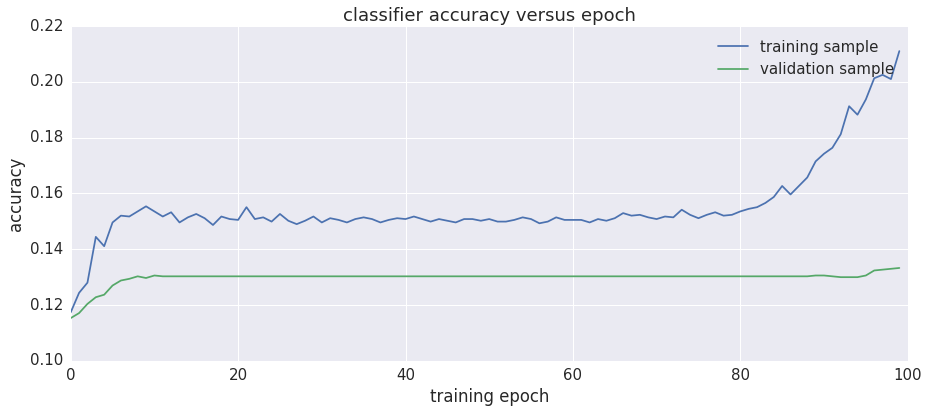

In [70]:
#plot accuracy vs training epoch
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = fit_history.epoch
yp = fit_history.history['acc']
ax.plot(xp, yp, label='training sample')
yp = fit_history.history['val_acc']
ax.plot(xp, yp, label='validation sample')
ax.set_title('classifier accuracy versus epoch')
ax.set_ylabel('accuracy')
ax.set_xlabel('training epoch')
ax.legend()
plt.savefig('figs/accuracy.png')

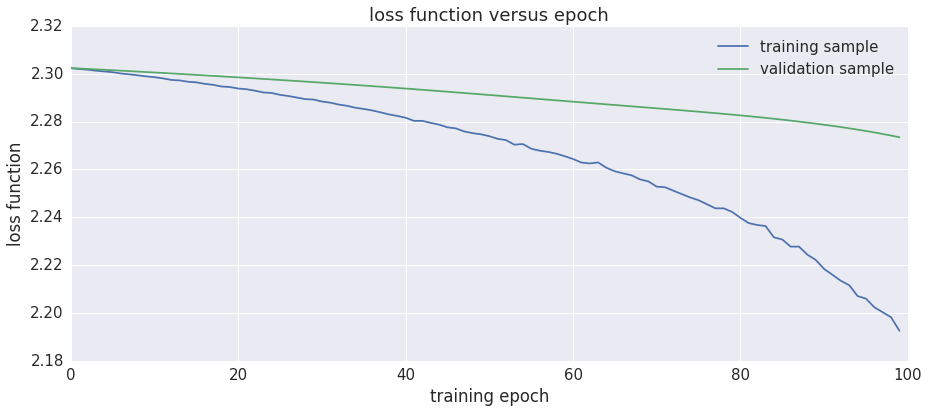

In [71]:
#plot loss function vs training epoch
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = fit_history.epoch
yp = fit_history.history['loss']
ax.plot(xp, yp, label='training sample')
yp = fit_history.history['val_loss']
ax.plot(xp, yp, label='validation sample')
ax.set_title('loss function versus epoch')
ax.set_ylabel('loss function')
ax.set_xlabel('training epoch')
ax.legend()
plt.savefig('figs/loss.png')

In [ ]:
#model.predict(x_test)